# Apply PCA to dataset

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas
import numpy
import matplotlib.pyplot as plt
import itertools
import sklearn
from sklearn.metrics import log_loss
from sklearn import preprocessing

In [4]:
import loan_approval_lib
from loan_approval_lib import logspace, linspace

In [5]:
data = loan_approval_lib.load_original_data()

# Data Cleaning

In [6]:
columns = [
    'person_age',
    'person_income',
    'person_emp_length',
    'loan_amnt',
    'loan_int_rate',
    'loan_percent_income',
    'cb_person_default_on_file'
]

for column in columns:
    row_count_1 = len(data)

    if column == 'person_age':
        data = data[data['person_age'] <= 100]

    if column == 'person_emp_length':
        data = data[data['person_emp_length'] <= 100]

    data = data[data[column].isna() == False]
    
    row_count_2 = len(data)
    row_count_diff = row_count_1 - row_count_2
    print(f'column {column}, number of removed rows: {row_count_diff}')
    

column person_age, number of removed rows: 5
column person_income, number of removed rows: 0
column person_emp_length, number of removed rows: 897
column loan_amnt, number of removed rows: 0
column loan_int_rate, number of removed rows: 3047
column loan_percent_income, number of removed rows: 0
column cb_person_default_on_file, number of removed rows: 0


# PCA

In [7]:
from sklearn.decomposition import PCA

In [8]:
data_subset = data[['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']]

data_subset_normalized = (data_subset - data_subset.mean()) / data_subset.std()

pca = PCA()
pca.fit(data_subset_normalized)

PCA()

In [9]:
pca.explained_variance_ratio_.sum()

np.float64(1.0)

In [10]:
pca.explained_variance_ratio_

array([0.28820691, 0.2332327 , 0.17539903, 0.13938162, 0.12018774,
       0.02618758, 0.01740443])

In [11]:
pca.components_

array([[ 0.64648678,  0.27335475,  0.26879933,  0.1537349 ,  0.01573094,
        -0.05053545,  0.63925209],
       [-0.05713073,  0.00107314, -0.00427279,  0.6739017 ,  0.28548659,
         0.67666835, -0.05648476],
       [-0.26326117,  0.73162762,  0.36302284,  0.29071813, -0.10710138,
        -0.28959907, -0.28943676],
       [ 0.01558549,  0.26358954, -0.42392006, -0.0691277 ,  0.81794054,
        -0.27598181,  0.02445617],
       [-0.07502421, -0.31549191,  0.78368022, -0.18743947,  0.48694323,
        -0.02698166, -0.08778533],
       [ 0.03285673, -0.47006002, -0.04254562,  0.63019441, -0.02501712,
        -0.61497162, -0.01389009],
       [ 0.70889589,  0.00510252, -0.01643345, -0.025453  ,  0.00359867,
         0.02478765, -0.70419834]])

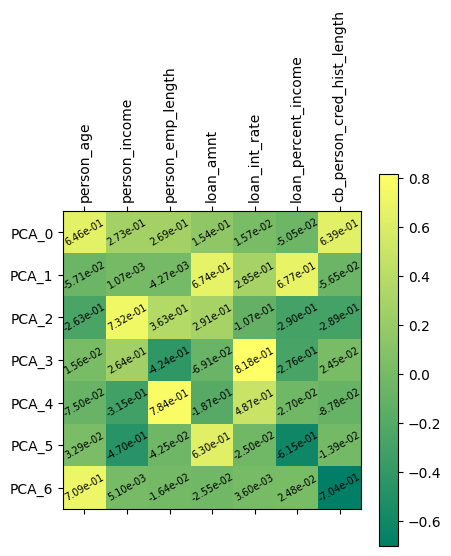

In [12]:
plt.matshow(pca.components_, cmap='summer')
plt.colorbar()

columns = data_subset_normalized.columns
pca_columns = [f'PCA_{i}' for i in range(len(columns))]

plt.xticks(numpy.arange(len(columns)), columns, rotation=90)
plt.yticks(numpy.arange(len(columns)), pca_columns)

for i in range(len(columns)):
    for j in range(len(columns)):
        value = pca.components_[i, j]
        if not numpy.isnan(value):
            plt.text(j, i, f"{value:.2e}", ha='center', va='center', color='black', size=7, rotation=30)

None

In [13]:
data_pca = pandas.DataFrame(
    pca.transform(data_subset_normalized),
    columns=[f'PCA_{i}' for i in range(len(data_subset_normalized.columns))],
    index=data_subset_normalized.index,
)

In [14]:
data_pca

,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6
1,-1.767243,-1.241211,-0.440293,-0.053325,0.843678,0.032209,-0.097013
2,-1.561901,2.334320,-2.172764,-0.447513,0.004877,-2.190508,0.297635
3,-0.686270,5.460670,0.433469,-0.108652,-0.216466,0.411848,0.110315
4,-0.071454,5.461338,0.427083,-0.865993,0.422764,0.361139,-0.137485
5,-2.019783,-0.477591,-0.912745,-1.155373,-0.426352,-0.625812,-0.060300
...,...,...,...,...,...,...,...
32576,6.522622,-1.207675,-3.600790,1.282544,-1.085296,0.178498,-0.840352
32577,5.262397,-0.015198,-0.840976,-0.433257,-1.852503,0.548090,0.683665
32578,7.831632,3.889238,-2.831754,-0.578622,-2.172379,0.898354,0.383192
32579,6.785403,-0.377018,-1.029174,0.831556,-1.326378,0.247301,-0.305383


In [15]:
data_subset

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
1,21,9600,5.0,1000,11.14,0.10,2
2,25,9600,1.0,5500,12.87,0.57,3
3,23,65500,4.0,35000,15.23,0.53,2
4,24,54400,8.0,35000,14.27,0.55,4
5,21,9900,2.0,2500,7.14,0.25,2
...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0.11,30
32577,54,120000,4.0,17625,7.49,0.15,19
32578,65,76000,3.0,35000,10.99,0.46,28
32579,56,150000,5.0,15000,11.48,0.10,26


In [16]:
data_pca_with_loan_status = data_pca
data_pca_with_loan_status['loan_status'] = data['loan_status']

In [17]:
data_pca_with_loan_status

,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,loan_status
1,-1.767243,-1.241211,-0.440293,-0.053325,0.843678,0.032209,-0.097013,0
2,-1.561901,2.334320,-2.172764,-0.447513,0.004877,-2.190508,0.297635,1
3,-0.686270,5.460670,0.433469,-0.108652,-0.216466,0.411848,0.110315,1
4,-0.071454,5.461338,0.427083,-0.865993,0.422764,0.361139,-0.137485,1
5,-2.019783,-0.477591,-0.912745,-1.155373,-0.426352,-0.625812,-0.060300,1
...,...,...,...,...,...,...,...,...
32576,6.522622,-1.207675,-3.600790,1.282544,-1.085296,0.178498,-0.840352,0
32577,5.262397,-0.015198,-0.840976,-0.433257,-1.852503,0.548090,0.683665,0
32578,7.831632,3.889238,-2.831754,-0.578622,-2.172379,0.898354,0.383192,1
32579,6.785403,-0.377018,-1.029174,0.831556,-1.326378,0.247301,-0.305383,0


In [18]:
data2 = data_pca_with_loan_status

# Logistic Regression PCA_0

-5 15
20
clf score: 0.7833892148644873


/tmp/ipykernel_1657/873925657.py:17: RuntimeWarning: invalid value encountered in divide
  h_data_ratio = h_data_reject / (h_data_reject + h_data_accept)


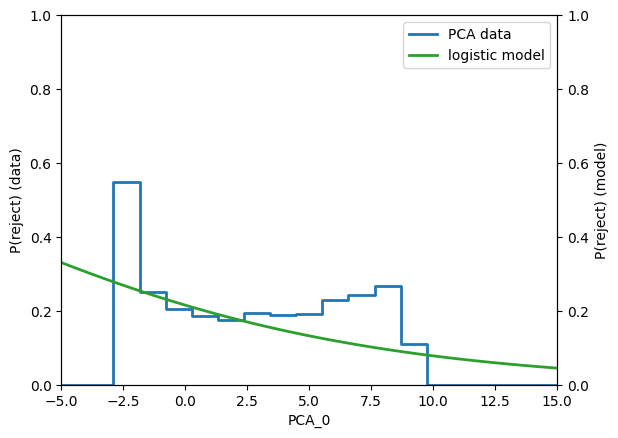

In [103]:
column = 'PCA_0'

data_accept = data2[data2['loan_status'] == 0]
data_reject = data2[data2['loan_status'] == 1]

_min = min(data_accept[column].min(), data_reject[column].min())
_max = max(data_accept[column].max(), data_reject[column].max())
_min = -5
_max = 15
print(_min, _max)
_steps = _max - _min
print(_steps)

bins = numpy.linspace(_min, _max, _steps)
h_data_accept, bins_accept = numpy.histogram(data_accept[column], bins=bins)
h_data_reject, bins_reject = numpy.histogram(data_reject[column], bins=bins)
h_data_ratio = h_data_reject / (h_data_reject + h_data_accept)
nan_index = numpy.isnan(h_data_ratio)
h_data_ratio[nan_index] = 0.0 #numpy.zeros(shape=h_data_ratio.shape)[nan_index] + numpy.ones(shape=h_data_ratio.shape)[nan_index]

lines1 = plt.step(
    bins_reject,
    numpy.concatenate([ [h_data_ratio[0]], h_data_ratio]),
    label='PCA data',
    color='tab:blue',
    linewidth=2,
)
plt.xlabel(column)
plt.ylabel('P(reject) (data)')
plt.ylim(0.0, 1.0)

x = data2[column].to_numpy().reshape(-1, 1)
y = data2['loan_status'].to_numpy()

model = sklearn.linear_model.LogisticRegression()
clf = model.fit(x, y)

print(f'clf score: {clf.score(x, y)}')

x_min = _min
x_max = _max
xx = numpy.linspace(x_min, x_max, 100)

plt.twinx()
lines2 = plt.plot(
    xx,
    clf.predict_proba(xx.reshape(-1, 1))[:, 1],
    label='logistic model',
    color='tab:green',
    linewidth=2,
)
plt.ylabel('P(reject) (model)')
plt.xlim(_min, _max)
plt.ylim(0.0, 1.0)
lines = lines1 + lines2
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='upper right')
plt.savefig(f'logistic_{column}.pdf')
None

# Logistic Regression PCA_1

-2.660964231473897 5.855794297281143
8.516758528755041
clf score: 0.7969055602123498


/tmp/ipykernel_1657/641407535.py:18: RuntimeWarning: invalid value encountered in divide
  h_data_ratio = h_data_reject / (h_data_reject + h_data_accept)


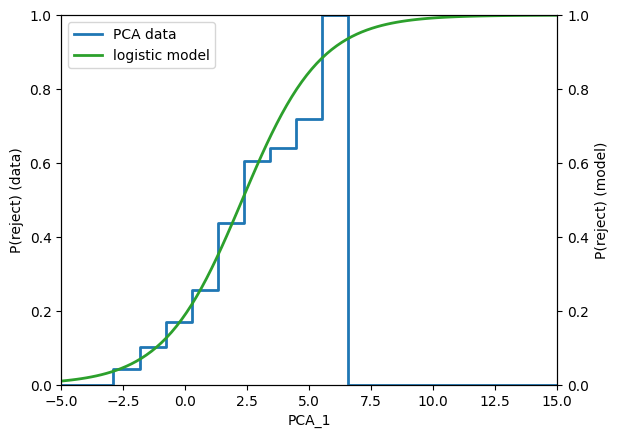

In [118]:
column = 'PCA_1'

data_accept = data2[data2['loan_status'] == 0]
data_reject = data2[data2['loan_status'] == 1]

_min = min(data_accept[column].min(), data_reject[column].min())
_max = max(data_accept[column].max(), data_reject[column].max())
print(_min, _max)
_steps = _max - _min
print(_steps)
_min = -5
_max = 15
_steps = _max - _min

bins = numpy.linspace(_min, _max, _steps)
h_data_accept, bins_accept = numpy.histogram(data_accept[column], bins=bins)
h_data_reject, bins_reject = numpy.histogram(data_reject[column], bins=bins)
h_data_ratio = h_data_reject / (h_data_reject + h_data_accept)
nan_index = numpy.isnan(h_data_ratio)
h_data_ratio[nan_index] = 0.0 #numpy.zeros(shape=h_data_ratio.shape)[nan_index] + numpy.ones(shape=h_data_ratio.shape)[nan_index]

lines1 = plt.step(
    bins_reject,
    numpy.concatenate([ [h_data_ratio[0]], h_data_ratio]),
    label='PCA data',
    color='tab:blue',
    linewidth=2,
)
plt.xlabel(column)
plt.ylabel('P(reject) (data)')
plt.ylim(0.0, 1.0)

x = data2[column].to_numpy().reshape(-1, 1)
y = data2['loan_status'].to_numpy()

model = sklearn.linear_model.LogisticRegression()
clf = model.fit(x, y)

print(f'clf score: {clf.score(x, y)}')

x_min = _min
x_max = _max
xx = numpy.linspace(x_min, x_max, 100)

plt.twinx()
lines2 = plt.plot(
    xx,
    clf.predict_proba(xx.reshape(-1, 1))[:, 1],
    label='logistic model',
    color='tab:green',
    linewidth=2,
)
plt.ylabel('P(reject) (model)')
plt.xlim(_min, _max)
plt.ylim(0.0, 1.0)
lines = lines1 + lines2
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='upper left')
plt.savefig(f'logistic_{column}.pdf')
None

# Logistic Regression PCA_2

-4.6206571156718645 26.673568350436266
31.29422546610813
clf score: 0.7838432523051132


/tmp/ipykernel_1657/3398921322.py:18: RuntimeWarning: invalid value encountered in divide
  h_data_ratio = h_data_reject / (h_data_reject + h_data_accept)


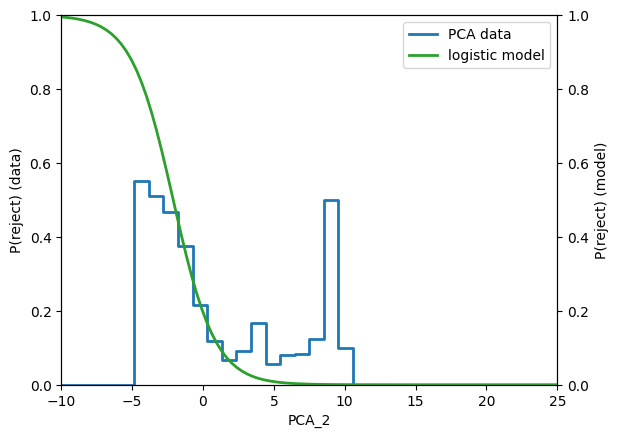

In [105]:
column = 'PCA_2'

data_accept = data2[data2['loan_status'] == 0]
data_reject = data2[data2['loan_status'] == 1]

_min = min(data_accept[column].min(), data_reject[column].min())
_max = max(data_accept[column].max(), data_reject[column].max())
print(_min, _max)
_steps = _max - _min
print(_steps)
_min = -10
_max = 25
_steps = _max - _min

bins = numpy.linspace(_min, _max, _steps)
h_data_accept, bins_accept = numpy.histogram(data_accept[column], bins=bins)
h_data_reject, bins_reject = numpy.histogram(data_reject[column], bins=bins)
h_data_ratio = h_data_reject / (h_data_reject + h_data_accept)
nan_index = numpy.isnan(h_data_ratio)
h_data_ratio[nan_index] = 0.0 #numpy.zeros(shape=h_data_ratio.shape)[nan_index] + numpy.ones(shape=h_data_ratio.shape)[nan_index]

lines1 = plt.step(
    bins_reject,
    numpy.concatenate([ [h_data_ratio[0]], h_data_ratio]),
    label='PCA data',
    color='tab:blue',
    linewidth=2,
)
plt.xlabel(column)
plt.ylabel('P(reject) (data)')
plt.ylim(0.0, 1.0)

x = data2[column].to_numpy().reshape(-1, 1)
y = data2['loan_status'].to_numpy()

model = sklearn.linear_model.LogisticRegression()
clf = model.fit(x, y)

print(f'clf score: {clf.score(x, y)}')

x_min = _min
x_max = _max
xx = numpy.linspace(x_min, x_max, 100)

plt.twinx()
lines2 = plt.plot(
    xx,
    clf.predict_proba(xx.reshape(-1, 1))[:, 1],
    label='logistic model',
    color='tab:green',
    linewidth=2,
)
plt.ylabel('P(reject) (model)')
plt.xlim(_min, _max)
plt.ylim(0.0, 1.0)
lines = lines1 + lines2
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='upper right')
plt.savefig(f'logistic_{column}.pdf')
None

# Logistic Regression PCA_3

-4.192768583925984 11.454447904627049
15.647216488553033
clf score: 0.7824462140262644


/tmp/ipykernel_1657/3492537749.py:18: RuntimeWarning: invalid value encountered in divide
  h_data_ratio = h_data_reject / (h_data_reject + h_data_accept)


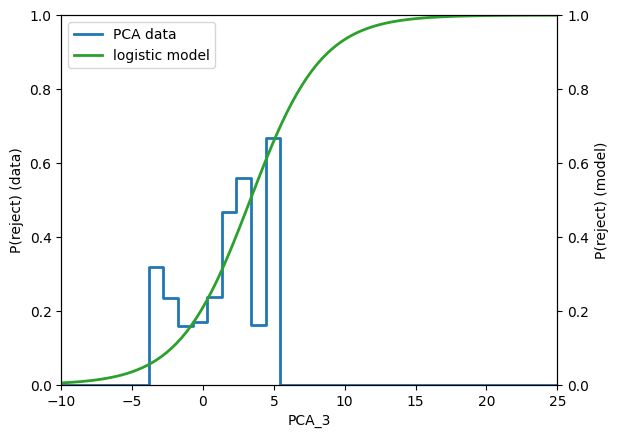

In [117]:
column = 'PCA_3'

data_accept = data2[data2['loan_status'] == 0]
data_reject = data2[data2['loan_status'] == 1]

_min = min(data_accept[column].min(), data_reject[column].min())
_max = max(data_accept[column].max(), data_reject[column].max())
print(_min, _max)
_steps = _max - _min
print(_steps)
_min = -10
_max = 25
_steps = _max - _min

bins = numpy.linspace(_min, _max, _steps)
h_data_accept, bins_accept = numpy.histogram(data_accept[column], bins=bins)
h_data_reject, bins_reject = numpy.histogram(data_reject[column], bins=bins)
h_data_ratio = h_data_reject / (h_data_reject + h_data_accept)
nan_index = numpy.isnan(h_data_ratio)
h_data_ratio[nan_index] = 0.0 #numpy.zeros(shape=h_data_ratio.shape)[nan_index] + numpy.ones(shape=h_data_ratio.shape)[nan_index]

lines1 = plt.step(
    bins_reject,
    numpy.concatenate([ [h_data_ratio[0]], h_data_ratio]),
    label='PCA data',
    color='tab:blue',
    linewidth=2,
)
plt.xlabel(column)
plt.ylabel('P(reject) (data)')
plt.ylim(0.0, 1.0)

x = data2[column].to_numpy().reshape(-1, 1)
y = data2['loan_status'].to_numpy()

model = sklearn.linear_model.LogisticRegression()
clf = model.fit(x, y)

print(f'clf score: {clf.score(x, y)}')

x_min = _min
x_max = _max
xx = numpy.linspace(x_min, x_max, 100)

plt.twinx()
lines2 = plt.plot(
    xx,
    clf.predict_proba(xx.reshape(-1, 1))[:, 1],
    label='logistic model',
    color='tab:green',
    linewidth=2,
)
plt.ylabel('P(reject) (model)')
plt.xlim(_min, _max)
plt.ylim(0.0, 1.0)
lines = lines1 + lines2
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='upper left')
plt.savefig(f'logistic_{column}.pdf')
None

# Logistic Regression PCA_4

-13.11270609778063 5.810094230745339
18.922800328525966
clf score: 0.7833193629505448


/tmp/ipykernel_1657/4176487513.py:18: RuntimeWarning: invalid value encountered in divide
  h_data_ratio = h_data_reject / (h_data_reject + h_data_accept)


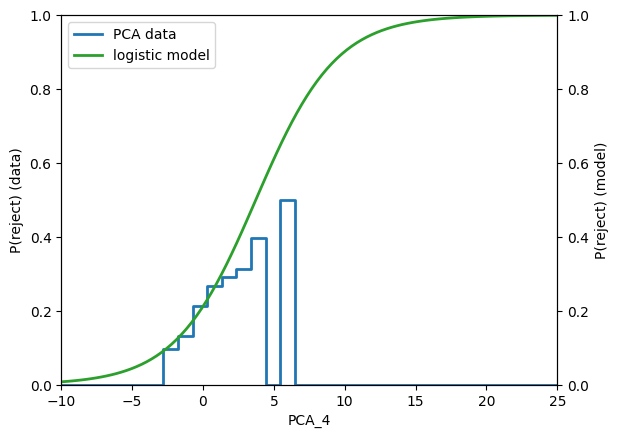

In [115]:
column = 'PCA_4'

data_accept = data2[data2['loan_status'] == 0]
data_reject = data2[data2['loan_status'] == 1]

_min = min(data_accept[column].min(), data_reject[column].min())
_max = max(data_accept[column].max(), data_reject[column].max())
print(_min, _max)
_steps = _max - _min
print(_steps)
_min = -10
_max = 25
_steps = _max - _min

bins = numpy.linspace(_min, _max, _steps)
h_data_accept, bins_accept = numpy.histogram(data_accept[column], bins=bins)
h_data_reject, bins_reject = numpy.histogram(data_reject[column], bins=bins)
h_data_ratio = h_data_reject / (h_data_reject + h_data_accept)
nan_index = numpy.isnan(h_data_ratio)
h_data_ratio[nan_index] = 0.0 #numpy.zeros(shape=h_data_ratio.shape)[nan_index] + numpy.ones(shape=h_data_ratio.shape)[nan_index]

lines1 = plt.step(
    bins_reject,
    numpy.concatenate([ [h_data_ratio[0]], h_data_ratio]),
    label='PCA data',
    color='tab:blue',
    linewidth=2,
)
plt.xlabel(column)
plt.ylabel('P(reject) (data)')
plt.ylim(0.0, 1.0)

x = data2[column].to_numpy().reshape(-1, 1)
y = data2['loan_status'].to_numpy()

model = sklearn.linear_model.LogisticRegression()
clf = model.fit(x, y)

print(f'clf score: {clf.score(x, y)}')

x_min = _min
x_max = _max
xx = numpy.linspace(x_min, x_max, 100)

plt.twinx()
lines2 = plt.plot(
    xx,
    clf.predict_proba(xx.reshape(-1, 1))[:, 1],
    label='logistic model',
    color='tab:green',
    linewidth=2,
)
plt.ylabel('P(reject) (model)')
plt.xlim(_min, _max)
plt.ylim(0.0, 1.0)
lines = lines1 + lines2
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='upper left')
plt.savefig(f'logistic_{column}.pdf')
None

# Logistic Regression PCA_5

-17.049971141868596 1.6433694740969504
18.693340615965546
clf score: 0.7891519977647388


/tmp/ipykernel_1657/3351234550.py:18: RuntimeWarning: invalid value encountered in divide
  h_data_ratio = h_data_reject / (h_data_reject + h_data_accept)


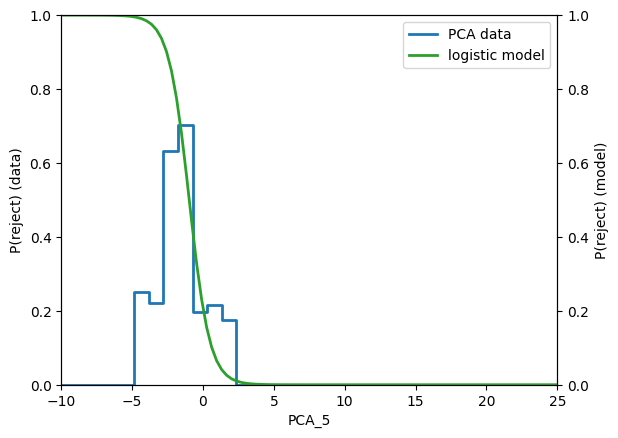

In [108]:
column = 'PCA_5'

data_accept = data2[data2['loan_status'] == 0]
data_reject = data2[data2['loan_status'] == 1]

_min = min(data_accept[column].min(), data_reject[column].min())
_max = max(data_accept[column].max(), data_reject[column].max())
print(_min, _max)
_steps = _max - _min
print(_steps)
_min = -10
_max = 25
_steps = _max - _min

bins = numpy.linspace(_min, _max, _steps)
h_data_accept, bins_accept = numpy.histogram(data_accept[column], bins=bins)
h_data_reject, bins_reject = numpy.histogram(data_reject[column], bins=bins)
h_data_ratio = h_data_reject / (h_data_reject + h_data_accept)
nan_index = numpy.isnan(h_data_ratio)
h_data_ratio[nan_index] = 0.0 #numpy.zeros(shape=h_data_ratio.shape)[nan_index] + numpy.ones(shape=h_data_ratio.shape)[nan_index]

lines1 = plt.step(
    bins_reject,
    numpy.concatenate([ [h_data_ratio[0]], h_data_ratio]),
    label='PCA data',
    color='tab:blue',
    linewidth=2,
)
plt.xlabel(column)
plt.ylabel('P(reject) (data)')
plt.ylim(0.0, 1.0)

x = data2[column].to_numpy().reshape(-1, 1)
y = data2['loan_status'].to_numpy()

model = sklearn.linear_model.LogisticRegression()
clf = model.fit(x, y)

print(f'clf score: {clf.score(x, y)}')

x_min = _min
x_max = _max
xx = numpy.linspace(x_min, x_max, 100)

plt.twinx()
lines2 = plt.plot(
    xx,
    clf.predict_proba(xx.reshape(-1, 1))[:, 1],
    label='logistic model',
    color='tab:green',
    linewidth=2,
)
plt.ylabel('P(reject) (model)')
plt.xlim(_min, _max)
plt.ylim(0.0, 1.0)
lines = lines1 + lines2
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='upper right')
plt.savefig(f'logistic_{column}.pdf')
None

# Logistic Regression PCA_6

-1.54183356449315 3.284242940180898
4.826076504674048
clf score: 0.7833892148644873


/tmp/ipykernel_1657/2202151775.py:18: RuntimeWarning: invalid value encountered in divide
  h_data_ratio = h_data_reject / (h_data_reject + h_data_accept)


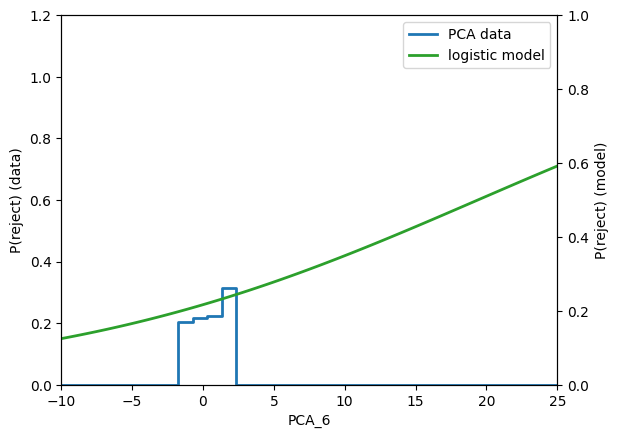

In [109]:
column = 'PCA_6'

data_accept = data2[data2['loan_status'] == 0]
data_reject = data2[data2['loan_status'] == 1]

_min = min(data_accept[column].min(), data_reject[column].min())
_max = max(data_accept[column].max(), data_reject[column].max())
print(_min, _max)
_steps = _max - _min
print(_steps)
_min = -10
_max = 25
_steps = _max - _min

bins = numpy.linspace(_min, _max, _steps)
h_data_accept, bins_accept = numpy.histogram(data_accept[column], bins=bins)
h_data_reject, bins_reject = numpy.histogram(data_reject[column], bins=bins)
h_data_ratio = h_data_reject / (h_data_reject + h_data_accept)
nan_index = numpy.isnan(h_data_ratio)
h_data_ratio[nan_index] = 0.0 #numpy.zeros(shape=h_data_ratio.shape)[nan_index] + numpy.ones(shape=h_data_ratio.shape)[nan_index]

lines1 = plt.step(
    bins_reject,
    numpy.concatenate([ [h_data_ratio[0]], h_data_ratio]),
    label='PCA data',
    color='tab:blue',
    linewidth=2,
)
plt.xlabel(column)
plt.ylabel('P(reject) (data)')
plt.ylim(0.0, 1.2)

x = data2[column].to_numpy().reshape(-1, 1)
y = data2['loan_status'].to_numpy()

model = sklearn.linear_model.LogisticRegression()
clf = model.fit(x, y)

print(f'clf score: {clf.score(x, y)}')

x_min = _min
x_max = _max
xx = numpy.linspace(x_min, x_max, 100)

plt.twinx()
lines2 = plt.plot(
    xx,
    clf.predict_proba(xx.reshape(-1, 1))[:, 1],
    label='logistic model',
    color='tab:green',
    linewidth=2,
)
plt.ylabel('P(reject) (model)')
plt.xlim(_min, _max)
plt.ylim(0.0, 1.0)
lines = lines1 + lines2
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='upper right')
plt.savefig(f'logistic_{column}.pdf')
None

# Create Function (Map) from PCA_1

- Use Logistic Regression as function map for now

-2.660964231473897 5.855794297281143
8.516758528755041
clf score: 0.7969055602123498


/tmp/ipykernel_1380/3328964992.py:18: RuntimeWarning: invalid value encountered in divide
  h_data_ratio = h_data_reject / (h_data_reject + h_data_accept)


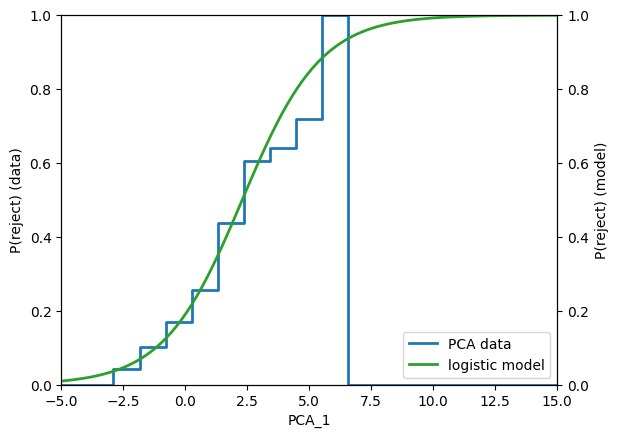

In [27]:
column = 'PCA_1'

data_accept = data2[data2['loan_status'] == 0]
data_reject = data2[data2['loan_status'] == 1]

_min = min(data_accept[column].min(), data_reject[column].min())
_max = max(data_accept[column].max(), data_reject[column].max())
print(_min, _max)
_steps = _max - _min
print(_steps)
_min = -5
_max = 15
_steps = _max - _min

bins = numpy.linspace(_min, _max, _steps)
h_data_accept, bins_accept = numpy.histogram(data_accept[column], bins=bins)
h_data_reject, bins_reject = numpy.histogram(data_reject[column], bins=bins)
h_data_ratio = h_data_reject / (h_data_reject + h_data_accept)
nan_index = numpy.isnan(h_data_ratio)
h_data_ratio[nan_index] = 0.0 #numpy.zeros(shape=h_data_ratio.shape)[nan_index] + numpy.ones(shape=h_data_ratio.shape)[nan_index]

lines1 = plt.step(
    bins_reject,
    numpy.concatenate([ [h_data_ratio[0]], h_data_ratio]),
    label='PCA data',
    color='tab:blue',
    linewidth=2,
)
plt.xlabel(column)
plt.ylabel('P(reject) (data)')
plt.ylim(0.0, 1.0)

x = data2[column].to_numpy().reshape(-1, 1)
y = data2['loan_status'].to_numpy()

model = sklearn.linear_model.LogisticRegression()
clf_PCA_1 = model.fit(x, y)

print(f'clf score: {clf_PCA_1.score(x, y)}')

x_min = _min
x_max = _max
xx = numpy.linspace(x_min, x_max, 100)

plt.twinx()
lines2 = plt.plot(
    xx,
    clf_PCA_1.predict_proba(xx.reshape(-1, 1))[:, 1],
    label='logistic model',
    color='tab:green',
    linewidth=2,
)
plt.ylabel('P(reject) (model)')
plt.xlim(_min, _max)
plt.ylim(0.0, 1.0)
lines = lines1 + lines2
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='lower right')
plt.savefig(f'logistic_{column}.pdf')
None

# Make Prediction using Test Dataset

In [19]:
data_test = loan_approval_lib.load_data()['test']

In [20]:
data_test

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
39093,97738,22,31200,MORTGAGE,2.0,DEBTCONSOLIDATION,B,3000,10.37,0.10,N,4
39094,97739,22,48000,MORTGAGE,6.0,EDUCATION,A,7000,6.03,0.15,N,3
39095,97740,51,60000,MORTGAGE,0.0,PERSONAL,A,15000,7.51,0.25,N,25
39096,97741,22,36000,MORTGAGE,4.0,PERSONAL,D,14000,15.62,0.39,Y,4


In [21]:
# transform data test in the same way as the original data has been transformed

data_test_subset = data_test[['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']]

data_test_subset_normalized = (data_test_subset - data_test_subset.mean()) / data_test_subset.std()

In [22]:
data_test_pca = pandas.DataFrame(
    pca.transform(data_test_subset_normalized),
    columns=[f'PCA_{i}' for i in range(len(data_test_subset_normalized.columns))],
    index=data_test_subset_normalized.index,
)

In [23]:
data_test_pca

,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6
0,-0.822188,3.963646,0.415266,0.766361,-0.009779,0.338038,0.122051
1,-0.070025,-0.118948,1.093074,0.779762,0.377311,0.055401,0.114065
2,-1.087271,-0.169236,-0.698369,1.624421,1.686425,-0.026186,0.496177
3,0.556341,-0.650423,-0.648776,-0.391406,-0.317607,0.098792,0.440151
4,0.241391,1.196570,1.369990,1.375475,1.136687,0.158456,0.101416
...,...,...,...,...,...,...,...
39093,-1.448322,-1.142799,-0.639843,0.218937,0.018198,0.108154,-0.318485
39094,-1.146269,-0.690476,0.334862,-1.484284,-0.138453,0.011958,-0.170193
39095,5.257658,0.581862,-2.777546,-0.535927,-2.348361,0.232969,-0.547531
39096,-1.104105,2.822267,-0.888840,0.445125,0.774773,-0.719874,-0.291843


In [28]:
data_test_pca_with_loan_status = data_test_pca
data_test_pca_with_loan_status['loan_status'] = \
    clf_PCA_1.predict_proba(
        data_test_pca['PCA_1'].to_numpy().reshape(-1, 1)
    )[:, 1]
data_test_pca_with_loan_status['id'] = data_test['id']

In [29]:
data_test_pca_with_loan_status

,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,loan_status,id
0,-0.822188,3.963646,0.415266,0.766361,-0.009779,0.338038,0.122051,0.741129,58645
1,-0.070025,-0.118948,1.093074,0.779762,0.377311,0.055401,0.114065,0.179080,58646
2,-1.087271,-0.169236,-0.698369,1.624421,1.686425,-0.026186,0.496177,0.174465,58647
3,0.556341,-0.650423,-0.648776,-0.391406,-0.317607,0.098792,0.440151,0.134967,58648
4,0.241391,1.196570,1.369990,1.375475,1.136687,0.158456,0.101416,0.333356,58649
...,...,...,...,...,...,...,...,...,...
39093,-1.448322,-1.142799,-0.639843,0.218937,0.018198,0.108154,-0.318485,0.102640,97738
39094,-1.146269,-0.690476,0.334862,-1.484284,-0.138453,0.011958,-0.170193,0.132045,97739
39095,5.257658,0.581862,-2.777546,-0.535927,-2.348361,0.232969,-0.547531,0.253379,97740
39096,-1.104105,2.822267,-0.888840,0.445125,0.774773,-0.719874,-0.291843,0.582271,97741


In [30]:
data_test_pca_with_loan_status[['id', 'loan_status']].to_csv(
    'data_test_predict-logistic-PCA_1.csv',
    index=False,
)

# PCA_0

-2.1860095152174988 17.32337140834986
19.50938092356736
clf score: 0.7833892148644873


/tmp/ipykernel_1380/2869960016.py:18: RuntimeWarning: invalid value encountered in divide
  h_data_ratio = h_data_reject / (h_data_reject + h_data_accept)


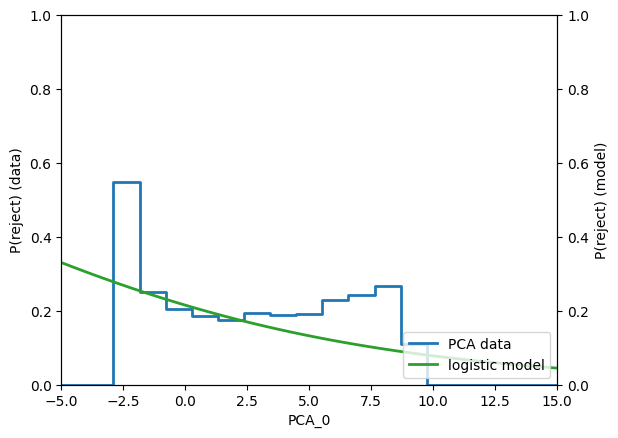

In [31]:
column = 'PCA_0'

data_accept = data2[data2['loan_status'] == 0]
data_reject = data2[data2['loan_status'] == 1]

_min = min(data_accept[column].min(), data_reject[column].min())
_max = max(data_accept[column].max(), data_reject[column].max())
print(_min, _max)
_steps = _max - _min
print(_steps)
_min = -5
_max = 15
_steps = _max - _min

bins = numpy.linspace(_min, _max, _steps)
h_data_accept, bins_accept = numpy.histogram(data_accept[column], bins=bins)
h_data_reject, bins_reject = numpy.histogram(data_reject[column], bins=bins)
h_data_ratio = h_data_reject / (h_data_reject + h_data_accept)
nan_index = numpy.isnan(h_data_ratio)
h_data_ratio[nan_index] = 0.0 #numpy.zeros(shape=h_data_ratio.shape)[nan_index] + numpy.ones(shape=h_data_ratio.shape)[nan_index]

lines1 = plt.step(
    bins_reject,
    numpy.concatenate([ [h_data_ratio[0]], h_data_ratio]),
    label='PCA data',
    color='tab:blue',
    linewidth=2,
)
plt.xlabel(column)
plt.ylabel('P(reject) (data)')
plt.ylim(0.0, 1.0)

x = data2[column].to_numpy().reshape(-1, 1)
y = data2['loan_status'].to_numpy()

model = sklearn.linear_model.LogisticRegression()
clf_PCA_0 = model.fit(x, y)

print(f'clf score: {clf_PCA_0.score(x, y)}')

x_min = _min
x_max = _max
xx = numpy.linspace(x_min, x_max, 100)

plt.twinx()
lines2 = plt.plot(
    xx,
    clf_PCA_0.predict_proba(xx.reshape(-1, 1))[:, 1],
    label='logistic model',
    color='tab:green',
    linewidth=2,
)
plt.ylabel('P(reject) (model)')
plt.xlim(_min, _max)
plt.ylim(0.0, 1.0)
lines = lines1 + lines2
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='lower right')
plt.savefig(f'logistic_{column}.pdf')
None

In [32]:
data_test_pca_with_loan_status = data_test_pca
data_test_pca_with_loan_status['loan_status'] = \
    clf_PCA_0.predict_proba(
        data_test_pca['PCA_0'].to_numpy().reshape(-1, 1)
    )[:, 1]
data_test_pca_with_loan_status['id'] = data_test['id']

In [33]:
data_test_pca_with_loan_status[['id', 'loan_status']].to_csv(
    'data_test_predict-logistic-PCA_0.csv',
    index=False,
)

# PCA_3

-4.192768583925984 11.454447904627049
15.647216488553033
clf score: 0.7824462140262644


/tmp/ipykernel_1380/3571336086.py:18: RuntimeWarning: invalid value encountered in divide
  h_data_ratio = h_data_reject / (h_data_reject + h_data_accept)


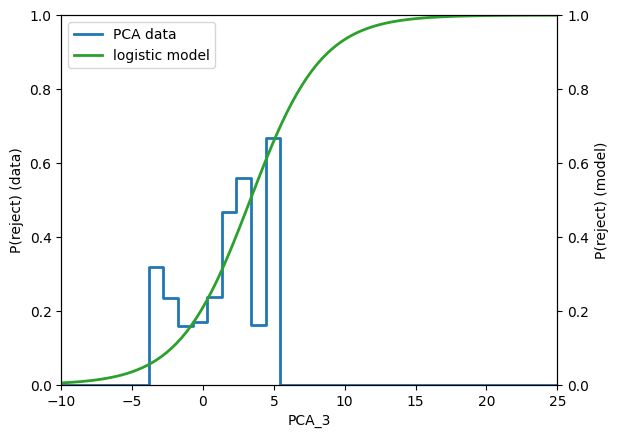

In [34]:
column = 'PCA_3'

data_accept = data2[data2['loan_status'] == 0]
data_reject = data2[data2['loan_status'] == 1]

_min = min(data_accept[column].min(), data_reject[column].min())
_max = max(data_accept[column].max(), data_reject[column].max())
print(_min, _max)
_steps = _max - _min
print(_steps)
_min = -10
_max = 25
_steps = _max - _min

bins = numpy.linspace(_min, _max, _steps)
h_data_accept, bins_accept = numpy.histogram(data_accept[column], bins=bins)
h_data_reject, bins_reject = numpy.histogram(data_reject[column], bins=bins)
h_data_ratio = h_data_reject / (h_data_reject + h_data_accept)
nan_index = numpy.isnan(h_data_ratio)
h_data_ratio[nan_index] = 0.0 #numpy.zeros(shape=h_data_ratio.shape)[nan_index] + numpy.ones(shape=h_data_ratio.shape)[nan_index]

lines1 = plt.step(
    bins_reject,
    numpy.concatenate([ [h_data_ratio[0]], h_data_ratio]),
    label='PCA data',
    color='tab:blue',
    linewidth=2,
)
plt.xlabel(column)
plt.ylabel('P(reject) (data)')
plt.ylim(0.0, 1.0)

x = data2[column].to_numpy().reshape(-1, 1)
y = data2['loan_status'].to_numpy()

model = sklearn.linear_model.LogisticRegression()
clf_PCA_3 = model.fit(x, y)

print(f'clf score: {clf_PCA_3.score(x, y)}')

x_min = _min
x_max = _max
xx = numpy.linspace(x_min, x_max, 100)

plt.twinx()
lines2 = plt.plot(
    xx,
    clf_PCA_3.predict_proba(xx.reshape(-1, 1))[:, 1],
    label='logistic model',
    color='tab:green',
    linewidth=2,
)
plt.ylabel('P(reject) (model)')
plt.xlim(_min, _max)
plt.ylim(0.0, 1.0)
lines = lines1 + lines2
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='upper left')
plt.savefig(f'logistic_{column}.pdf')
None

In [35]:
data_test_pca_with_loan_status = data_test_pca
data_test_pca_with_loan_status['loan_status'] = \
    clf_PCA_3.predict_proba(
        data_test_pca['PCA_3'].to_numpy().reshape(-1, 1)
    )[:, 1]
data_test_pca_with_loan_status['id'] = data_test['id']

In [36]:
data_test_pca_with_loan_status[['id', 'loan_status']].to_csv(
    'data_test_predict-logistic-PCA_3.csv',
    index=False,
)

# Appendix

In [123]:
# sanity check - this does not remove any data, so ok

columns = [
    'person_age',
    'person_income',
    'person_emp_length',
    'loan_amnt',
    'loan_int_rate',
    'loan_percent_income',
    'cb_person_default_on_file'
]

for column in columns:
    row_count_1 = len(data_test)

    if column == 'person_age':
        data_test = data_test[data_test['person_age'] <= 100]

    if column == 'person_emp_length':
        data_test = data_test[data_test['person_emp_length'] <= 100]

    data_test = data_test[data_test[column].isna() == False]
    
    row_count_2 = len(data_test)
    row_count_diff = row_count_1 - row_count_2
    print(f'column {column}, number of removed rows: {row_count_diff}')

column person_age, number of removed rows: 0
column person_income, number of removed rows: 0
column person_emp_length, number of removed rows: 0
column loan_amnt, number of removed rows: 0
column loan_int_rate, number of removed rows: 0
column loan_percent_income, number of removed rows: 0
column cb_person_default_on_file, number of removed rows: 0
